In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().values.any()

False

In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

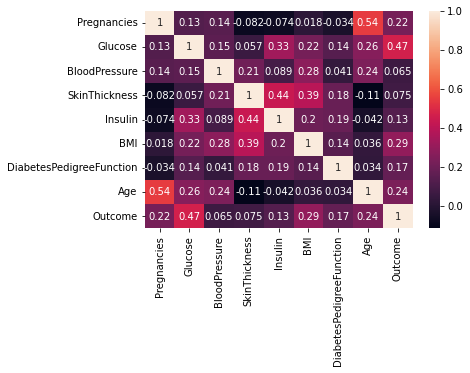

In [7]:
cormat=data.corr()
top_corr_feature=cormat.index
sns.heatmap(data[top_corr_feature].corr(),annot=True)

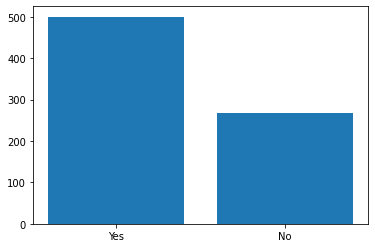

In [8]:
plt.bar(['Yes','No'],data['Outcome'].value_counts())
plt.show()

In [9]:
Features=data.iloc[:,:8]
Target=data[['Outcome']]

In [10]:
feature_train, feature_test, target_train, train_test = train_test_split(Features,Target, test_size=0.33, random_state=0)

In [11]:
print('Number of rows = {0}'.format(len(data)))
print('Number of 0s in Glucose = {0}'.format(len(data.loc[data['Glucose']==0])))
print('Number of 0s in BloodPressure = {0}'.format(len(data.loc[data['BloodPressure']==0])))
print('Number of 0s in SkinThickness = {0}'.format(len(data.loc[data['SkinThickness']==0])))
print('Number of 0s in Insulin = {0}'.format(len(data.loc[data['Insulin']==0])))
print('Number of 0s in BMI = {0}'.format(len(data.loc[data['BMI']==0])))
print('Number of 0s in DiabetesPedigreeFunction = {0}'.format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print('Number of 0s in Age = {0}'.format(len(data.loc[data['Age']==0])))

Number of rows = 768
Number of 0s in Glucose = 5
Number of 0s in BloodPressure = 35
Number of 0s in SkinThickness = 227
Number of 0s in Insulin = 374
Number of 0s in BMI = 11
Number of 0s in DiabetesPedigreeFunction = 0
Number of 0s in Age = 0


In [12]:
features_train=feature_train.iloc[:,1:]
features_test=feature_test.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(features_train)
imputer.transform(features_test)

array([[199.   ,  76.   ,  43.   , ...,  42.9  ,   1.394,  22.   ],
       [107.   ,  74.   ,  30.   , ...,  33.6  ,   0.404,  23.   ],
       [ 76.   ,  62.   ,   0.   , ...,  34.   ,   0.391,  25.   ],
       ...,
       [145.   ,  82.   ,  18.   , ...,  32.5  ,   0.235,  70.   ],
       [ 90.   ,  80.   ,  14.   , ...,  24.4  ,   0.249,  24.   ],
       [128.   ,  48.   ,  45.   , ...,  40.5  ,   0.613,  24.   ]])

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(features_train,target_train.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred=knn.predict(features_test)

In [15]:
from sklearn import metrics
print(metrics.classification_report(train_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       170
           1       0.43      0.40      0.42        84

    accuracy                           0.63       254
   macro avg       0.57      0.57      0.57       254
weighted avg       0.62      0.63      0.62       254



In [16]:
print(metrics.confusion_matrix(train_test,pred))

[[125  45]
 [ 50  34]]


In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
clf.fit(features_train, target_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
y_pred=clf.predict(features_test)

In [19]:
print(metrics.classification_report(train_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       170
           1       0.51      0.52      0.51        84

    accuracy                           0.67       254
   macro avg       0.63      0.64      0.63       254
weighted avg       0.68      0.67      0.67       254



In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy', random_state=0,max_depth=5)

In [21]:
rfc.fit(features_train,target_train.values.ravel())

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=0)

In [22]:
Y_pred=rfc.predict(features_test)

In [23]:
print(metrics.classification_report(train_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       170
           1       0.69      0.43      0.53        84

    accuracy                           0.75       254
   macro avg       0.73      0.67      0.68       254
weighted avg       0.74      0.75      0.73       254

